In [2]:
# IMAGE RECOGNITION

# Tensorflow and numpy to create the neural network
import tensorflow as tf
import numpy as np

# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt

# OS to load files and save checkpoints
import os

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

import random


In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict


def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0

    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))

    # The incorrect image

    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])

    return transposed_data

Categories :
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
shape before reshape : (50000, 32, 32, 3)
This is a(n) horse:


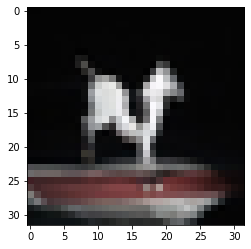

In [5]:
# LOADING THE DATA:

image_height = 32
image_width = 32
color_channels = 3

train_data = np.array([])
train_labels = np.array([])

# Load all the data batches.
for i in range(5):
    data_batch = unpickle( 'data_set/data_batch_' + str(i + 1))
    #for field in data_batch: print(field) 

    train_data = np.append(train_data, data_batch['data'])
    train_labels = np.append(train_labels, data_batch['labels'])

# Load the eval batch.
test_batch = unpickle( 'data_set/test_batch')
test_data = test_batch['data']
test_labels = test_batch['labels']

# Load the english category names.
category_names_bytes = unpickle('data_set/batches.meta')['label_names']
print("Categories :")
print(category_names_bytes)

# Process data
train_data = process_data(train_data)
test_data = process_data(test_data)


print(f'shape before reshape : {np.shape(train_data)}')

# Print a random image with it's label
index_image = random.randint(0,np.shape(test_data)[0])
image = train_data[index_image]
#print(image.dtype)
#print(image.shape)
print(f'This is a(n) {category_names_bytes[int(train_labels[index_image])]}:')
plt.imshow(image)
plt.show()

This is a(n) bird:


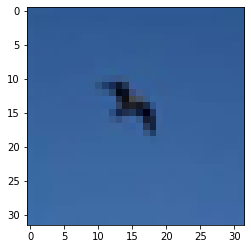

In [30]:
# Print a random image with it's label
index_image = random.randint(0,np.shape(test_data)[0])
image = train_data[index_image]
#print(image.dtype)
#print(image.shape)
print(f'This is a(n) {category_names_bytes[int(train_labels[index_image])]}:')
plt.imshow(image)
plt.show()

In [4]:
# Training and testing our model
#clf = MLPClassifier(random_state=1,learning_rate_init=0.01,learning_rate = 'adaptive',activation='relu' , max_iter=100,verbose=True,hidden_layer_sizes=(50,100,50),solver = 'adam').fit(X_train_scaled[:10000],train_labels[:10000])
#print(test_labels)
#print(clf.predict_proba(X_test_scaled))
#print(clf.predict(X_test_scaled))
#print(clf.score(X_test_scaled, test_labels))

In [18]:
import sys
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness(trainX, trainY,testX,testY):
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(testX, testY), verbose=True)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    #learning curves
    summarize_diagnostics(history)
    return model


In [18]:
model_trained = run_test_harness(train_data[:10000],to_categorical(train_labels),test_data, to_categorical(test_labels))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_9520/1339552798.py:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(testX, testY), verbose=True)


Epoch 1/20
781/781 [==============================] - 224s 285ms/step - loss: 2.1716 - accuracy: 0.2813 - val_loss: 2.0098 - val_accuracy: 0.2942
Epoch 2/20
781/781 [==============================] - 223s 286ms/step - loss: 1.6694 - accuracy: 0.3820 - val_loss: 1.7781 - val_accuracy: 0.3696
Epoch 3/20
781/781 [==============================] - 226s 289ms/step - loss: 1.5423 - accuracy: 0.4332 - val_loss: 1.7705 - val_accuracy: 0.3761
Epoch 4/20
781/781 [==============================] - 223s 286ms/step - loss: 1.4671 - accuracy: 0.4620 - val_loss: 1.6071 - val_accuracy: 0.4238
Epoch 5/20
781/781 [==============================] - 220s 282ms/step - loss: 1.4091 - accuracy: 0.4833 - val_loss: 1.6661 - val_accuracy: 0.4219
Epoch 6/20
781/781 [==============================] - 220s 282ms/step - loss: 1.3554 - accuracy: 0.5073 - val_loss: 1.5840 - val_accuracy: 0.4430
Epoch 7/20
781/781 [==============================] - 221s 283ms/step - loss: 1.3026 - accuracy: 0.5277 - val_loss: 1.6279 -

In [16]:
model_trained.save('model_trained')

NameError: name 'model_trained' is not defined

In [19]:
model = keras.models.load_model('model_trained')

In [21]:
prediction = model.predict(test_data[5:100])
print(np.argmax(prediction, axis = 1))
print(test_labels[5:100])

[6 1 6 6 1 4 9 6 7 9 6 5 7 8 6 7 0 4 9 4 6 4 6 9 6 6 5 6 6 9 6 4 1 9 5 0 6
 5 6 0 9 6 9 4 6 9 8 6 6 8 8 6 6 6 6 7 5 6 3 6 6 1 0 3 4 4 6 8 8 9 2 0 6 3
 8 8 1 1 7 5 7 5 4 8 9 0 6 8 6 4 6 6 0 0 7]
[6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]


In [ ]:
# Detection 

def compareCard(subArray, COLOR):
    sum = 0
    for column in range(subArray.shape()[0]):
        for row in range(subArray.shape()[1]):
            if subArray[column,row] == COLOR:
                sum +=1
    result = sum/ ( subArray.shape()[0]*subArray.shape()[1] )
    return result

def detection(image, background_color, backside_color):

    BACKGROUND_COLOR = background_color
    BACKSIDE_COLOR = backside_color

    card_shape = (32,32)
    
    card_list = []

    for column in range(image.shape()[0] - card_shape[0]):
        for row in range(image.shape()[1] - card_shape[1]):
            subArray = image[column:column+card_shape[0], row:row+card_shape[1]]
            if compareCard(subArray,BACKGROUND_COLOR) == 0:
                card_list.append(subArray)
    
    for card in card_list:
        if compareCard(card,BACKSIDE_COLOR) == 0:
            return card

In [69]:
class Main_AI():
    def __init__(self,nb_cards:int,model_name:str="model_trained"):
        self.memory={number:"unknown_card" for number in range(nb_cards)}
        self.card=None
        #self.model = keras.models.load_model('model_trained')
    
    def get_list_index_unknown(self):
        return [k for k in self.memory if self.memory[k]=="unknown_card"]
    
    def choose_random_unknown_card(self):
        unknown_list = self.get_list_index_unknown()
        self.card=random.choice(unknown_list)
        return self.card
    
    async def receive_board(self,image_board):
        pass
    
    async def wait_verif(self,)
    
    def send_card(self, number:int):
        pass
    
    def images_classification(self,images_list):
        return self.model.predict(images_list)
    
    async def run(self):
        finished = (np.size(self.get_list_index_unknown()) == 0)
        step = 0
        while(not finished):
            print('step {step}')
            self.send_card(number)
            
            #board = receive_board()
            #images_list = detection(board,background_color, backside_color)
            images_list = temp_get_images()
            
            
            self.send_card(number)
            step += 1
            

In [71]:
ai  = Main_AI(3)
ai.run()

2

In [ ]:
def main():
    ai  = Main_AI(3)
    ai.run()